In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Equations of motion

In [2]:
def EOM(t, f, mu1, mu2, a):

    x, y, z, w, vx, vy, vz = f

    # These would be constant at a lagrange point
    r1 = np.sqrt((x+a*mu2)**2 + y**2 + z**2)
    r2 = np.sqrt((x-a*mu1)**2 + y**2 + z**2)

    # Equations of motion
    GW_losses = False
    vw = (96/5)*mu1*mu2*w**(11/3) if GW_losses else 0.0
    ax = 2*w*vy + w**2*x + vw*y - (mu1*(x+a*mu2))/(r1**3) - (mu2*(x-a*mu1))/(r2**3)
    ay = -2*w*vx + w**2*y - vw*x - (mu1*y)/(r1**3) - (mu2*y)/(r2**3)
    az = -mu1*z/(r1**3) - (mu2*z)/(r2**3)

    dfdt = [vx, vy, vz, vw, ax, ay, az]

    return dfdt

## Simple examples

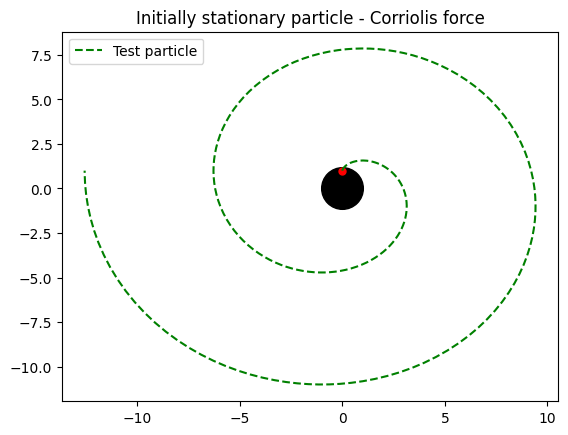

In [11]:
# No masses

mu2 = 0.0
mu1 = 0.0
a = 1                 # semi-major axis
w = a**-1.5           # angular velocity, given by Kepler's third law (with G=c=1)

# Initial position and velocity of the test particle
x0 = 0.0
y0 = 1.0
z0 = 0.0
vx0 = 0.0
vy0 = 0.0
vz0 = 0.0


# Define time span and initial state vector
N = 10000
orbital_period = 2*np.pi*a**1.5
T = 2 * orbital_period
t0 = 0
t = np.linspace(t0, T, N)
f0 = [x0, y0, z0, w, vx0, vy0, vz0]

# Solve ODE

sol = solve_ivp(EOM, [t0, T], f0, args=(mu1, mu2, a), method='RK45', dense_output=True, rtol=1e-9, atol=1e-9)

# Extract positions and plot orbit
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]
w = sol.y[3]
vx = sol.y[4]
vy = sol.y[5]
vz = sol.y[6]

# Plot
fig, ax = plt.subplots()

# Plot two primary masses
ax.plot(-a*mu2, 0, 'o', color='blue', markersize=10)
ax.plot(a*mu1, 0, 'o', color='black', markersize=30)

# Plot initial position of test particle
ax.plot(x0, y0, 'o', color='red', markersize=5)

ax.plot(x, y, label='Test particle', color='green', ls='--')
ax.legend()
plt.title("Initially stationary particle - Corriolis force")
plt.show()



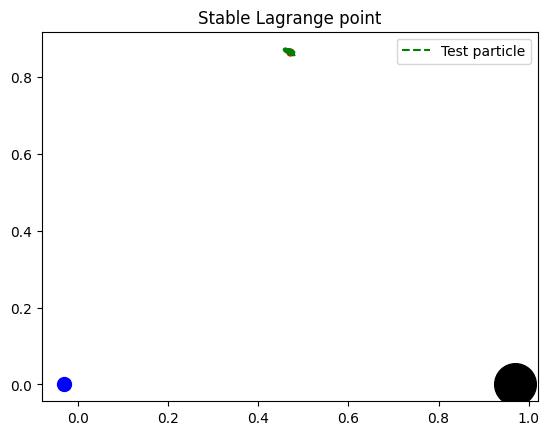

In [30]:
# Stable lagrange point, no GW losses or frame dragging
# Given particle small perturbation, to demonstate orbit is indeed stable

mu2 = 0.03
mu1 = 1 - mu2
# mu1 = mu2 = 1/2
a = 1                 # semi-major axis
w = a**-1.5           # angular velocity, given by Kepler's third law (with G=c=1)

# Initial position and velocity of the test particle
x0 = (-a*mu2+a*mu1)/2
y0 = (a*mu2+a*mu1)*np.sqrt(3)/2
z0 = 0.0
vx0 = 0.001
vy0 = 0.001
vz0 = 0.0

# Distance of test particle to each of the primary masses
# r1 = np.sqrt((x0+a*mu2)**2 + y0**2 + z0**2)
# r2 = np.sqrt((x0-a*mu1)**2 + y0**2 + z0**2)

# Define time span and initial state vector
N = 100000
orbital_period = 2*np.pi*a**1.5
T = 10 * orbital_period
t0 = 0
t = np.linspace(t0, T, N)
dt = T/N
f0 = [x0, y0, z0, w, vx0, vy0, vz0]

# Solve ODE

sol = solve_ivp(EOM, [t0, T], f0, args=(mu1, mu2, a), method='RK45', dense_output=True, rtol=1e-10, atol=1e-10)

# Extract positions and plot orbit
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]
w = sol.y[3]
vx = sol.y[4]
vy = sol.y[5]
vz = sol.y[6]

# Plot
fig, ax = plt.subplots()

# Plot two primary masses
ax.plot(-a*mu2, 0, 'o', color='blue', markersize=10)
ax.plot(a*mu1, 0, 'o', color='black', markersize=30)

# Plot initial position of test particle
ax.plot(x0, y0, 'o', color='red', markersize=5)

ax.plot(x, y, label='Test particle', color='green', ls='--')
ax.legend()
plt.title("Stable Lagrange point")
plt.show()



In [202]:
# L1 lagrange point (unstable)

mu2 = 0.5
mu1 = 1 - mu2
a = 1                 # semi-major axis
w = a**-1.5           # angular velocity, given by Kepler's third law (with G=c=1)

# Initial position and velocity of the test particle
x0 = 0.0
y0 = 0
z0 = 0.0
vx0 = 0.000
vy0 = 0.0
vz0 = 0.0

# Define time span and initial state vector
N = 1000
orbital_period = 2*np.pi*a**1.5
T = 1 * orbital_period
t0 = 0
t = np.linspace(t0, T, N)
dt = T/N
f0 = [x0, y0, z0, w, vx0, vy0, vz0]

# Solve ODE

sol = solve_ivp(EOM, [t0, T], f0, args=(mu1, mu2, a), method='RK45', dense_output=True, rtol=1e-9, atol=1e-9)

# Extract positions and plot orbit
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]
w = sol.y[3]
vx = sol.y[4]
vy = sol.y[5]
vz = sol.y[6]

# Plot
fig, ax = plt.subplots()

# Plot two primary masses
ax.plot(-a*mu2, 0, 'o', color='blue', markersize=10)
ax.plot(a*mu1, 0, 'o', color='black', markersize=30)

# Plot initial position of test particle
ax.plot(x0, y0, 'o', color='red', markersize=5)

ax.plot(x, y, label='Test particle', color='green', ls='--')
ax.legend()
plt.title("L1")
plt.show()


TypeError: EOM() missing 2 required positional arguments: 'J' and 'GW_losses'

In [35]:
# Now add losses due to gravitational radiation

def EOM(t, f, mu1, mu2, a):

    x, y, z, w, vx, vy, vz = f

    # These would be constant at a lagrange point
    r1 = np.sqrt((x+a*mu2)**2 + y**2 + z**2)
    r2 = np.sqrt((x-a*mu1)**2 + y**2 + z**2)

    # Equations of motion
    GW_losses = True
    vw = (96/5)*mu1*mu2*w**(11/3) if GW_losses else 0.0
    ax = 2*w*vy + w**2*x + vw*y - (mu1*(x+a*mu2))/(r1**3) - (mu2*(x-a*mu1))/(r2**3)
    ay = -2*w*vx + w**2*y - vw*x - (mu1*y)/(r1**3) - (mu2*y)/(r2**3)
    az = -mu1*z/(r1**3) - (mu2*z)/(r2**3)

    dfdt = [vx, vy, vz, vw, ax, ay, az]

    return dfdt

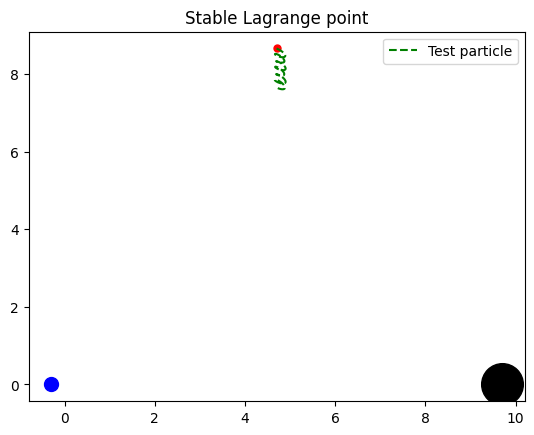

In [53]:
mu2 = 0.03
mu1 = 1 - mu2
a = 10                 # semi-major axis
w = a**-1.5           # angular velocity, given by Kepler's third law (with G=c=1)

# Initial position and velocity of the test particle
x0 = (-a*mu2+a*mu1)/2
y0 = (a*mu2+a*mu1)*np.sqrt(3)/2
z0 = 0.0
vx0 = 0.00
vy0 = 0.00
vz0 = 0.0

# Distance of test particle to each of the primary masses
# r1 = np.sqrt((x0+a*mu2)**2 + y0**2 + z0**2)
# r2 = np.sqrt((x0-a*mu1)**2 + y0**2 + z0**2)

# Define time span and initial state vector
N = 100000
orbital_period = 2*np.pi*a**1.5
T = 10 * orbital_period
t0 = 0
t = np.linspace(t0, T, N)
dt = T/N
f0 = [x0, y0, z0, w, vx0, vy0, vz0]

# Solve ODE

sol = solve_ivp(EOM, [t0, T], f0, args=(mu1, mu2, a), method='RK45', dense_output=True, rtol=1e-10, atol=1e-10)

# Extract positions and plot orbit
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]
w = sol.y[3]
vx = sol.y[4]
vy = sol.y[5]
vz = sol.y[6]

# Plot
fig, ax = plt.subplots()

# Plot two primary masses
ax.plot(-a*mu2, 0, 'o', color='blue', markersize=10)
ax.plot(a*mu1, 0, 'o', color='black', markersize=30)

# Plot initial position of test particle
ax.plot(x0, y0, 'o', color='red', markersize=5)

ax.plot(x, y, label='Test particle', color='green', ls='--')
ax.legend()
plt.title("Stable Lagrange point")
plt.show()



C:\Users\jmonc\AppData\Local\Temp\ipykernel_30600\2829451353.py:12: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  particle.set_data(x[i], y[i])


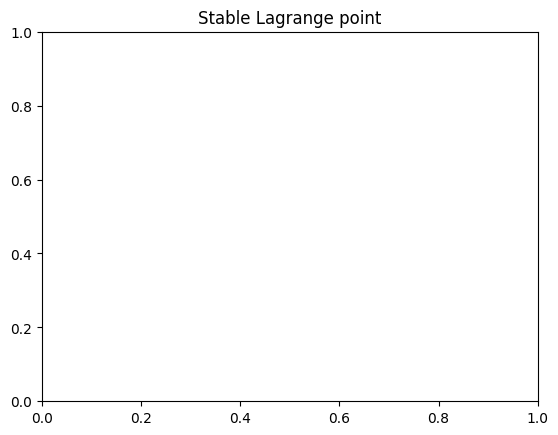

In [55]:
# Make into animation

from matplotlib.animation import FuncAnimation
mass1, = ax.plot(-a*mu2, 0, 'o', color='blue', markersize=10)
mass2, = ax.plot(a*mu1, 0, 'o', color='black', markersize=30)
particle, = ax.plot([], [], 'o', color='red', markersize=5)
trail, = ax.plot([], [], label='Test particle', color='green', ls='--')

ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.legend()

def animate(i):
    particle.set_data(x[i], y[i])
    trail.set_data(x[:i], y[:i])
    return particle, trail,

ani = FuncAnimation(fig, animate, frames=len(t), interval=20, blit=True)

plt.title("Stable Lagrange point")
plt.show()

In [56]:
ani

In [57]:
ani.save('L1.mp4', writer='ffmpeg', fps=60)

C:\Users\jmonc\AppData\Local\Temp\ipykernel_30600\2829451353.py:12: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  particle.set_data(x[i], y[i])


IndexError: index 373 is out of bounds for axis 0 with size 373

## Add in frame dragging

In [110]:
def EOM(t, f, mu1, mu2, a, J, GW_losses):

    x, y, z, w, vx, vy, vz = f

    # These would be constant at a lagrange point
    r1 = np.sqrt((x+a*mu2)**2 + y**2 + z**2)
    r2 = np.sqrt((x-a*mu1)**2 + y**2 + z**2)
    r = np.sqrt(x**2 + y**2 + z**2)

    # Equations of motion
    vw = (96/5)*mu1*mu2*w**(11/3) if GW_losses else 0.0
    ax = 2*w*vy + w**2*x + vw*y - (mu1*(x+a*mu2))/(r1**3) - (mu2*(x-a*mu1))/(r2**3)
    ay = -2*w*vx + w**2*y - vw*x - (mu1*y)/(r1**3) - (mu2*y)/(r2**3)
    az = -mu1*z/(r1**3) - (mu2*z)/(r2**3)

    # Frame dragging
    v = np.array([vx, vy, vz])
    Bg = J/(r**5) * np.array([-3*y*x, -3*y**2+r**2, -3*y*z])
    ag = 4 * np.cross(v, Bg)
    ag_x, ag_y, ag_z = ag[0], ag[1], ag[2]

    ax += ag_x
    ay += ag_y
    az += ag_z

    dfdt = [vx, vy, vz, vw, ax, ay, az]

    return dfdt

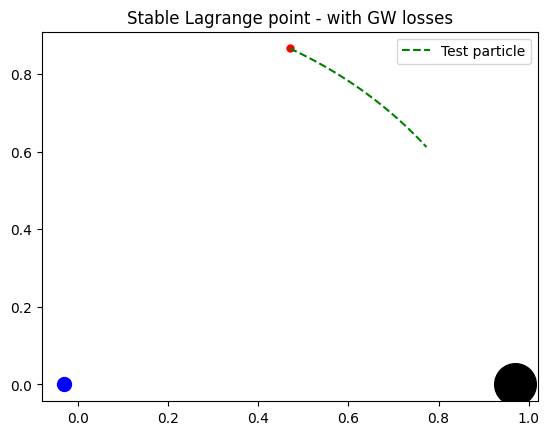

In [160]:
mu2 = 0.03
mu1 = 1 - mu2
a = 1                 # semi-major axis
w = a**-1.5           # angular velocity, given by Kepler's third law (with G=c=1)

# Initial position and velocity of the test particle
x0 = (-a*mu2+a*mu1)/2
y0 = (a*mu2+a*mu1)*np.sqrt(3)/2
z0 = 0.0
vx0 = 0.001
vy0 = 0.001
vz0 = 0.0

# Define time span and initial state vector
N = 100000
orbital_period = 2*np.pi*a**1.5
T = 10 * orbital_period
t0 = 0
t = np.linspace(t0, T, N)
dt = T/N
f0 = [x0, y0, z0, w, vx0, vy0, vz0]

# Solve ODE

sol = solve_ivp(EOM, [t0, T], f0, args=(mu1, mu2, a, 0, True), method='RK45', dense_output=True, rtol=1e-10, atol=1e-10)

# Extract positions and plot orbit
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]
w = sol.y[3]
vx = sol.y[4]
vy = sol.y[5]
vz = sol.y[6]

# Plot
fig, ax = plt.subplots()

# Plot two primary masses
ax.plot(-a*mu2, 0, 'o', color='blue', markersize=10)
ax.plot(a*mu1, 0, 'o', color='black', markersize=30)

# Plot initial position of test particle
ax.plot(x0, y0, 'o', color='red', markersize=5)

ax.plot(x, y, label='Test particle', color='green', ls='--')
ax.legend()
plt.title("Stable Lagrange point - with GW losses")
plt.show()



C:\Users\jmonc\AppData\Local\Temp\ipykernel_30600\3039821973.py:37: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  plt.plot(z, label=mus[thetas.index(z)])


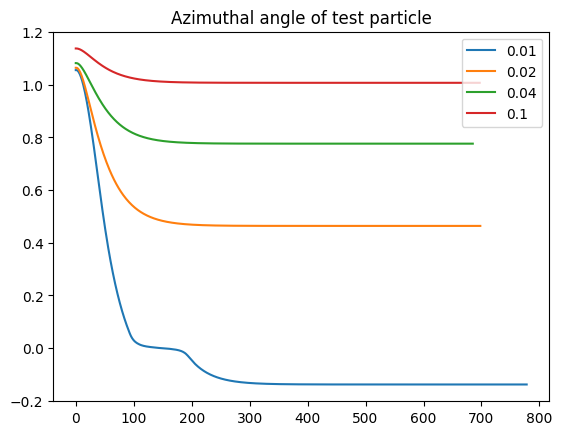

In [176]:
thetas = []
mus = [1/100, 1/50, 1/25, 1/10]
for mu in mus:
    mu2 = mu
    mu1 = 1 - mu2
    a = 1                 # semi-major axis
    w = a**-1.5           # angular velocity, given by Kepler's third law (with G=c=1)

    # Initial position and velocity of the test particle
    x0 = (-a*mu2+a*mu1)/2
    y0 = (a*mu2+a*mu1)*np.sqrt(3)/2
    z0 = 0.0
    vx0 = 0.001
    vy0 = 0.001
    vz0 = 0.0

    # Define time span and initial state vector
    N = 100000
    orbital_period = 2*np.pi*a**1.5
    T = 10 * orbital_period
    t0 = 0
    t = np.linspace(t0, T, N)
    dt = T/N
    f0 = [x0, y0, z0, w, vx0, vy0, vz0]

    # Solve ODE

    sol = solve_ivp(EOM, [t0, T], f0, args=(mu1, mu2, a, 0, True), method='RK45', dense_output=True, rtol=1e-10, atol=1e-10)

    # Extract positions and plot orbit
    x = sol.y[0]
    y = sol.y[1]

    thetas.append(np.arctan(y/x))

for z in thetas:
    plt.plot(z, label=mus[thetas.index(z)])
plt.title("Azimuthal angle of test particle")
plt.legend()

In [167]:
np.arctan(y/x)

array([1.07356785, 1.0735601 , 1.07317522, 1.07220253, 1.07068324,
       1.06865868, 1.06616932, 1.06325488, 1.05995398, 1.05630382,
       1.05233995, 1.04809607, 1.04360394, 1.03889332, 1.03399194,
       1.02892552, 1.02371783, 1.01839079, 1.01296448, 1.00745733,
       1.00188615, 0.99626627, 0.99061164, 0.98493493, 0.97924762,
       0.97356008, 0.96788171, 0.96222097, 0.95658548, 0.95098209,
       0.94541692, 0.93989549, 0.93442268, 0.92900287, 0.92363993,
       0.91833728, 0.91309794, 0.90792455, 0.90281939, 0.89778446,
       0.89282145, 0.88793181, 0.88311673, 0.87837719, 0.87371398,
       0.8691277 , 0.8646188 , 0.86018754, 0.85583408, 0.85155844,
       0.84736053, 0.84324015, 0.839197  , 0.83523069, 0.83134078,
       0.82752673, 0.82378795, 0.82012377, 0.8165335 , 0.81301637,
       0.80957159, 0.80619833, 0.80289572, 0.79966285, 0.79649881,
       0.79340265, 0.7903734 , 0.78741008, 0.78451169, 0.78167722,
       0.77890565, 0.77619596, 0.77354711, 0.77095807, 0.76842

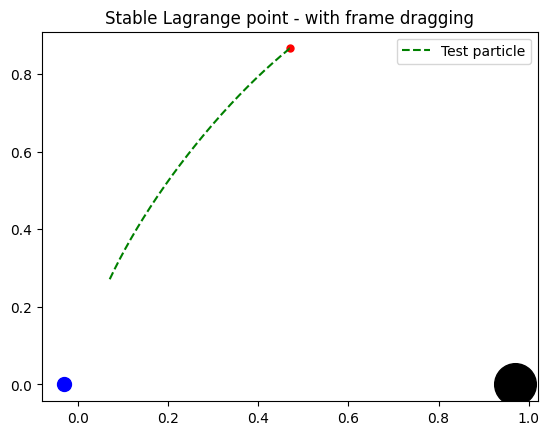

In [117]:
mu2 = 0.03
mu1 = 1 - mu2
# mu1 = mu2 = 1/2
a = 1                 # semi-major axis
w = a**-1.5           # angular velocity, given by Kepler's third law (with G=c=1)

# Initial position and velocity of the test particle
x0 = (-a*mu2+a*mu1)/2
y0 = (a*mu2+a*mu1)*np.sqrt(3)/2
z0 = 0.0
vx0 = 0.000
vy0 = 0.000
vz0 = 0.0

# Distance of test particle to each of the primary masses
# r1 = np.sqrt((x0+a*mu2)**2 + y0**2 + z0**2)
# r2 = np.sqrt((x0-a*mu1)**2 + y0**2 + z0**2)

# Define time span and initial state vector
N = 1000
orbital_period = 2*np.pi*a**1.5
T = 3.67 * orbital_period
t0 = 0
t = np.linspace(t0, T, N)
dt = T/N
f0 = [x0, y0, z0, w, vx0, vy0, vz0]

# Solve ODE

sol = solve_ivp(EOM, [t0, T], f0, args=(mu1, mu2, a, 1.1, 0), method='RK45', dense_output=True, rtol=1e-10, atol=1e-10)

# Extract positions and plot orbit
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]
w = sol.y[3]
vx = sol.y[4]
vy = sol.y[5]
vz = sol.y[6]

# Plot
fig, ax = plt.subplots()

# Plot two primary masses
ax.plot(-a*mu2, 0, 'o', color='blue', markersize=10)
ax.plot(a*mu1, 0, 'o', color='black', markersize=30)

# Plot initial position of test particle
ax.plot(x0, y0, 'o', color='red', markersize=5)

ax.plot(x, y, label='Test particle', color='green', ls='--')
ax.legend()
plt.title("Stable Lagrange point - with frame dragging")
plt.show()



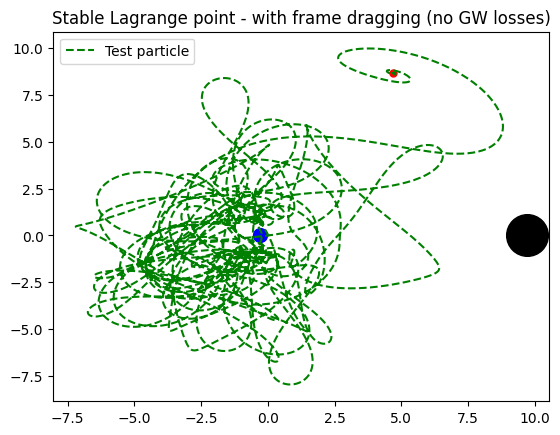

In [146]:
mu2 = 0.03
mu1 = 1 - mu2
# mu1 = mu2 = 1/2
a = 10                 # semi-major axis
w = a**-1.5           # angular velocity, given by Kepler's third law (with G=c=1)

# Initial position and velocity of the test particle
x0 = (-a*mu2+a*mu1)/2
y0 = (a*mu2+a*mu1)*np.sqrt(3)/2
z0 = 0.0
vx0 = 0.000
vy0 = 0.000
vz0 = 0.0

# Distance of test particle to each of the primary masses
# r1 = np.sqrt((x0+a*mu2)**2 + y0**2 + z0**2)
# r2 = np.sqrt((x0-a*mu1)**2 + y0**2 + z0**2)

# Define time span and initial state vector
N = 1000
orbital_period = 2*np.pi*a**1.5
T = 35 * orbital_period
t0 = 0
t = np.linspace(t0, T, N)
dt = T/N
f0 = [x0, y0, z0, w, vx0, vy0, vz0]

# Solve ODE

sol = solve_ivp(EOM, [t0, T], f0, args=(mu1, mu2, a, 1.1, False), method='RK45', dense_output=True, rtol=1e-10, atol=1e-10)

# Extract positions and plot orbit
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]
w = sol.y[3]
vx = sol.y[4]
vy = sol.y[5]
vz = sol.y[6]

# Plot
fig, ax = plt.subplots()

# Plot two primary masses
ax.plot(-a*mu2, 0, 'o', color='blue', markersize=10)
ax.plot(a*mu1, 0, 'o', color='black', markersize=30)

# Plot initial position of test particle
ax.plot(x0, y0, 'o', color='red', markersize=5)

ax.plot(x, y, label='Test particle', color='green', ls='--')
ax.legend()
plt.title("Stable Lagrange point - with frame dragging (no GW losses)")
plt.show()



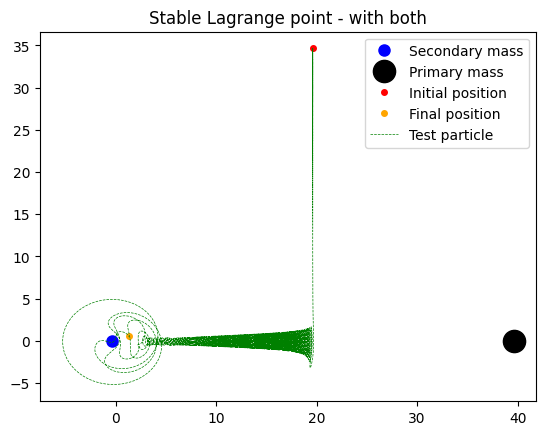

In [159]:
mu2 = 1/100
mu1 = 1 - mu2
# mu1 = mu2 = 1/2
a = 40                 # semi-major axis
w = a**-1.5           # angular velocity, given by Kepler's third law (with G=c=1)

# Initial position and velocity of the test particle
x0 = (-a*mu2+a*mu1)/2
y0 = (a*mu2+a*mu1)*np.sqrt(3)/2
z0 = 0.0
vx0 = 0.000
vy0 = 0.0
vz0 = 0.0


# Define time span and initial state vector
N = 1000
orbital_period = 2*np.pi*a**1.5
T = 5000 * orbital_period
t0 = 0
t = np.linspace(t0, T, N)
dt = T/N
f0 = [x0, y0, z0, w, vx0, vy0, vz0]

# Solve ODE

sol = solve_ivp(EOM, [t0, T], f0, args=(mu1, mu2, a, 0, True), method='RK45', dense_output=True, rtol=1e-10, atol=1e-10)

# Extract positions and plot orbit
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]
w = sol.y[3]
vx = sol.y[4]
vy = sol.y[5]
vz = sol.y[6]

# Plot
fig, ax = plt.subplots()

# Plot two primary masses
ax.plot(-a*mu2, 0, 'o', color='blue', markersize=8, label="Secondary mass")
ax.plot(a*mu1, 0, 'o', color='black', markersize=16, label="Primary mass")

# Plot initial and final position of test particle
ax.plot(x0, y0, 'o', color='red', markersize=4, label = "Initial position")
ax.plot(x[-1], y[-1], 'o', color='orange', markersize=4, label = "Final position")
ax.plot(x, y, label='Test particle', color='green', ls='--', linewidth=0.5)
ax.legend()
plt.title("Stable Lagrange point - with both")
plt.show()



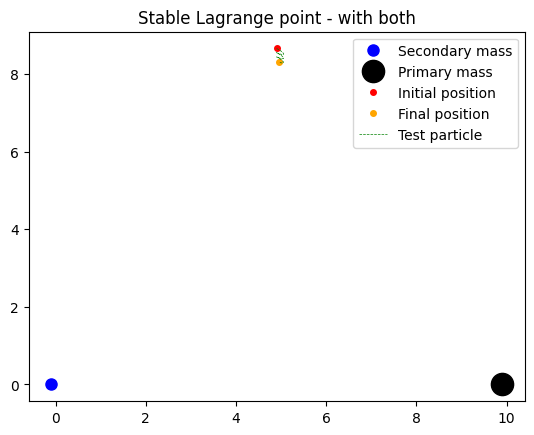

In [139]:
mu2 = 1/100
mu1 = 1 - mu2
# mu1 = mu2 = 1/2
a = 10                 # semi-major axis
w = a**-1.5           # angular velocity, given by Kepler's third law (with G=c=1)

# Initial position and velocity of the test particle
x0 = (-a*mu2+a*mu1)/2
y0 = (a*mu2+a*mu1)*np.sqrt(3)/2
z0 = 0.0
vx0 = 0.000
vy0 = 0.0
vz0 = 0.0


# Define time span and initial state vector
N = 1000
orbital_period = 2*np.pi*a**1.5
T = 10 * orbital_period
t0 = 0
t = np.linspace(t0, T, N)
dt = T/N
f0 = [x0, y0, z0, w, vx0, vy0, vz0]

# Solve ODE

sol = solve_ivp(EOM, [t0, T], f0, args=(mu1, mu2, a, 0, True), method='RK45', dense_output=True, rtol=1e-10, atol=1e-10)

# Extract positions and plot orbit
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]
w = sol.y[3]
vx = sol.y[4]
vy = sol.y[5]
vz = sol.y[6]

# Plot
fig, ax = plt.subplots()

# Plot two primary masses
ax.plot(-a*mu2, 0, 'o', color='blue', markersize=8, label="Secondary mass")
ax.plot(a*mu1, 0, 'o', color='black', markersize=16, label="Primary mass")

# Plot initial and final position of test particle
ax.plot(x0, y0, 'o', color='red', markersize=4, label = "Initial position")
ax.plot(x[-1], y[-1], 'o', color='orange', markersize=4, label = "Final position")
ax.plot(x, y, label='Test particle', color='green', ls='--', linewidth=0.5)
ax.legend()
plt.title("Stable Lagrange point - with both")
plt.show()



In [148]:
print(z)

[ 0.00000000e+00 -3.31785201e-33 -4.41606102e-30 ... -2.39704184e+00
 -2.35817986e+00 -2.32449684e+00]


In [150]:
print(y)

[ 8.66025404  8.66025404  8.66025404 ... -1.70742498 -1.59166333
 -1.50185383]


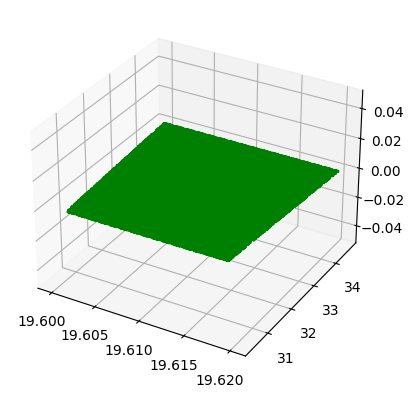

In [155]:
# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='Test particle', color='green', ls='--')


In [156]:
x

array([19.6       , 19.6       , 19.60000002, ..., 19.61339042,
       19.61487091, 19.61577247])

In [157]:
y

array([34.64101615, 34.64101615, 34.64101614, ..., 30.40014363,
       30.39859349, 30.39757403])

In [158]:
z

array([0., 0., 0., ..., 0., 0., 0.])

In [197]:
def EOM(t, f, mu1, mu2, a, J, GW_losses):

    x, y, z, w, vx, vy, vz = f

    # These would be constant at a lagrange point
    r1 = np.sqrt((x+a*mu2)**2 + y**2 + z**2)
    r2 = np.sqrt((x-a*mu1)**2 + y**2 + z**2)
    r = np.sqrt(x**2 + y**2 + z**2)

    # Equations of motion
    vw = (96/5)*mu1*mu2*w**(11/3) if GW_losses else 0.0
    ax = 2*w*vy + w**2*x + vw*y - (mu1*(x+a*mu2))/(r1**3) - (mu2*(x-a*mu1))/(r2**3)
    ay = -2*w*vx + w**2*y - vw*x - (mu1*y)/(r1**3) - (mu2*y)/(r2**3)
    az = -mu1*z/(r1**3) - (mu2*z)/(r2**3)

    # Frame dragging
    v = np.array([vx, vy, vz])
    Bg = J/(r**5) * np.array([-3*y*x, -3*y**2+r**2, -3*y*z])
    ag = 4 * np.cross(v, Bg)

    # This is dodgy, making acceleration due to frame dragging purely in the y direction
    ag = np.linalg.norm(ag) * np.array([0, 1, 0])

    ag_x, ag_y, ag_z = ag[0], ag[1], ag[2]

    ax += ag_x
    ay += ag_y
    az += ag_z

    dfdt = [vx, vy, vz, vw, ax, ay, az]

    return dfdt

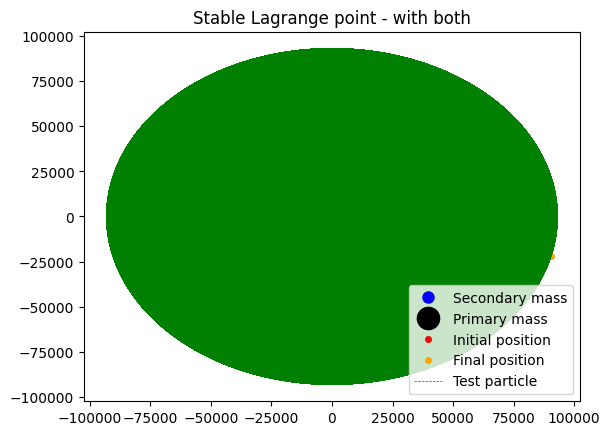

In [199]:
mu2 = 1/100
mu1 = 1 - mu2
# mu1 = mu2 = 1/2
a = 40                 # semi-major axis
w = a**-1.5           # angular velocity, given by Kepler's third law (with G=c=1)

# Initial position and velocity of the test particle
x0 = (-a*mu2+a*mu1)/2
y0 = (a*mu2+a*mu1)*np.sqrt(3)/2
z0 = 0.0
vx0 = 0.000
vy0 = 0.0
vz0 = 0.0


# Define time span and initial state vector
N = 1000
orbital_period = 2*np.pi*a**1.5
T = 5000 * orbital_period
t0 = 0
t = np.linspace(t0, T, N)
dt = T/N
f0 = [x0, y0, z0, w, vx0, vy0, vz0]

# Solve ODE

sol = solve_ivp(EOM, [t0, T], f0, args=(mu1, mu2, a, 0, True), method='RK45', dense_output=True, rtol=1e-10, atol=1e-10)

# Extract positions and plot orbit
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]
w = sol.y[3]
vx = sol.y[4]
vy = sol.y[5]
vz = sol.y[6]

# Plot
fig, ax = plt.subplots()

# Plot two primary masses
ax.plot(-a*mu2, 0, 'o', color='blue', markersize=8, label="Secondary mass")
ax.plot(a*mu1, 0, 'o', color='black', markersize=16, label="Primary mass")

# Plot initial and final position of test particle
ax.plot(x0, y0, 'o', color='red', markersize=4, label = "Initial position")
ax.plot(x[-1], y[-1], 'o', color='orange', markersize=4, label = "Final position")
ax.plot(x, y, label='Test particle', color='green', ls='--', linewidth=0.5)
ax.legend()
plt.title("Stable Lagrange point - with both")
plt.show()

# Particle escapes due to spin, and ejection occurs


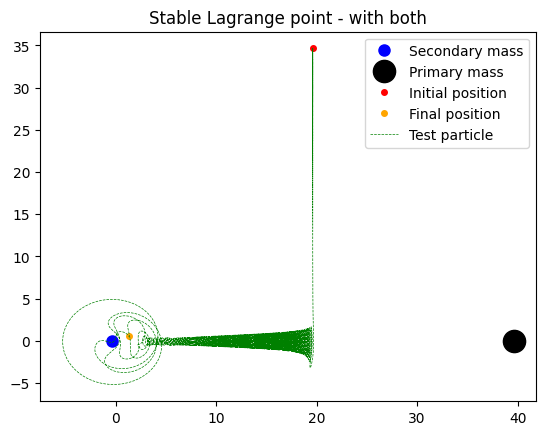

In [200]:
mu2 = 1/100
mu1 = 1 - mu2
# mu1 = mu2 = 1/2
a = 40                 # semi-major axis
w = a**-1.5           # angular velocity, given by Kepler's third law (with G=c=1)

# Initial position and velocity of the test particle
x0 = (-a*mu2+a*mu1)/2
y0 = (a*mu2+a*mu1)*np.sqrt(3)/2
z0 = 0.0
vx0 = 0.000
vy0 = 0.0
vz0 = 0.0


# Define time span and initial state vector
N = 1000
orbital_period = 2*np.pi*a**1.5
T = 5000 * orbital_period
t0 = 0
t = np.linspace(t0, T, N)
dt = T/N
f0 = [x0, y0, z0, w, vx0, vy0, vz0]

# Solve ODE

sol = solve_ivp(EOM, [t0, T], f0, args=(mu1, mu2, a, 0, True), method='RK45', dense_output=True, rtol=1e-10, atol=1e-10)

# Extract positions and plot orbit
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]
w = sol.y[3]
vx = sol.y[4]
vy = sol.y[5]
vz = sol.y[6]

# Plot
fig, ax = plt.subplots()

# Plot two primary masses
ax.plot(-a*mu2, 0, 'o', color='blue', markersize=8, label="Secondary mass")
ax.plot(a*mu1, 0, 'o', color='black', markersize=16, label="Primary mass")

# Plot initial and final position of test particle
ax.plot(x0, y0, 'o', color='red', markersize=4, label = "Initial position")
ax.plot(x[-1], y[-1], 'o', color='orange', markersize=4, label = "Final position")
ax.plot(x, y, label='Test particle', color='green', ls='--', linewidth=0.5)
ax.legend()
plt.title("Stable Lagrange point - with both")
plt.show()


# Particle does not escape, without spin. It will fall into the combined black holes
